In [1]:
import sys
sys.path.append('./qdarts')

from qdarts.experiment import Experiment
from qdarts.plotting import plot_polytopes

import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import utilities.config as c
import utilities.utils  as u
import utilities.model_utils  as mu

### Looking at the data

In [2]:
# 14
# 5121290610
# 5099976477
# 5091324709

<PIL.Image.Image image mode=RGBA size=96x96 at 0x21BBC9E28B0>
C_DD matrix:
[[10.97329776  0.87911179]
 [ 0.87911179  6.28130508]]

C_DG matrix:
[[8.92898043 1.16520554]
 [0.96822458 4.43396871]]


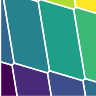

In [4]:
u.reconstruct_img_with_matrices(14,'5091324709.png', True)[0]

### Data preprocessing

In [ ]:
datapoints = mu.load_datapoints(param_names=['csd', 'C_DD', 'C_DG'])
# datapoints = mu.load_datapoints(param_names=['csd', 'C_DD', 'C_DG'], all_batches=False, batches=np.arange(2,8))

print(f"The amount of datapoints loaded: {len(datapoints)}.")
print(f"The shape of CSD {datapoints[0][0].shape}, and its type {type(datapoints[0][0])}.")

#### Reconstructed image from saved np.ndarray

In [3]:
example = datapoints[19] # 67, 19

In [ ]:
example_csd = example[0]
u.reconstruct_img_from_tensor(example_csd)

#### The preprocessed input seen by the model

In [ ]:
%matplotlib inline

tensor = mu.preprocess_csd(example_csd)
mu.show_image_from_tensor(tensor)

#### Output preproccess

In [ ]:
c_dd, c_dg = example[1], example[2]
print(f"C_DD: \n {c_dd}\n")
print(f"C_DG: \n {c_dg}")

In [ ]:
# output -> a vector -> row by row first from C_DD, then C_DG -> K*(K+1)/2 + K^2 (elements)
#   
output = mu.preprocess_capacitance_matrices(c_dd, c_dg)
assert len(output) == c.K*(c.K+1)//2 + c.K**2

print(output) 

#### Filter dataset

In [ ]:
unfiltered_datapoints = datapoints.copy()
filtred_datapoints = mu.filter_dataset(datapoints)

print(f"Before filtration: {len(unfiltered_datapoints)}.\nAfter filtration: {len(filtred_datapoints)} ({100*len(filtred_datapoints)/len(unfiltered_datapoints):.2f}%).")
# datapoints = filtred_datapoints

#### Train model

### Unit tests

In [2]:
c_dd, c_dg = u.generate_capacitance_matrices()
output = mu.preprocess_capacitance_matrices(c_dd, c_dg)
c_dd_rec, c_dg_rec = mu.reconstruct_capacitance_matrices(output)

assert (c_dd == c_dd_rec).all() and (c_dg == c_dg_rec).all()

In [54]:
# output -> a vector -> row by row first from C_DD, then C_DG -> K*(K+1)/2 + K^2 (elements)outputmupepocess_cpacitance_matricesc_ddc_dg
# c_m = 0.5
# c_dd = np.array([[3.1, 0.5], [0.5, 2.9]])
# np.sum(c_dg, axis=1).T*np.eye(c.K)+c_m

c_dd, c_dg = u.generate_capacitance_matrices()
c_m =  c_dd[0,1]

c_dd_test = np.array([[c_dg[0,0]+c_dg[0,1]+c_m, c_m], [c_m, c_dg[1,0]+c_dg[1,1]+c_m]])

if c.K == 2:
    assert (c_dd == c_dd_test).all()
    assert c_dd[0,1] == c_dd[1,0]

0.9666325313529429 [[5.67113297 1.13930947]
 [0.78004842 6.41334499]]
